# TRABAJO FINAL ECONOMETRÍA - HOUSE PRICE
## DOBLE GRADO INGENIERÍA INFORMÁTICA Y ADE
## Componentes del grupo:
- **Pablo Bolaños Martínez**
- **Gabriel Filipov Petkov**
- **Pedro Antonio Prieto Fernández**
- **Florín Emanuel Todor Gliga**

## Descripción:
Este estudio se enfoca en examinar el precio de algunas de las casas de un área de EEUU, considerando varios factores clave. Se recopiló información sobre los ingresos promedios del area, la antigüedad de las casas, el número de habitaciones, el número de dormitorios, la población del área y el precio de venta. 

El objetivo principal es hacer una estimación del precio de la vivienda respecto a las diferentes variables que tenemos. Los resultados de este estudio proporcionarán información valiosa para compradores, vendedores y agentes inmobiliarios interesados en el mercado de bienes raíces del área.

## Desarrollo del estudio:

### Cargamos nuestra base de datos

1. Eliminamos la columna de Address (que no nos aporta datos numéricos).
2. Redondeamos tanto el Number of Rooms como el Number of Bedrooms (ya que aparecían con decimales y no debe ser así porque las habitaciones tienen que ser números enteros).
3. Tomamos logaritmos en algunas de nuestras variables para ver si podemos "suavizar" el modelo.  
4. Mostramos las 5 primeras líneas para ver cómo se nos han quedado los datos finalmente.

In [34]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df= pd.read_csv ('House_price.csv', sep=';')

print(df.columns)

df = df.drop(columns=['Address'])

df['Number of Rooms'] = np.ceil(df['Number of Rooms'])
df['Number of Bedrooms'] = np.ceil(df['Number of Bedrooms'])

df['lAvg. Area Income'] = np.log(df['Avg. Area Income'])
df['lHouse Age'] = np.log(df['House Age'])
df['lArea Population'] = np.log(df['Area Population'])
df['lPrice'] = np.log(df['Price'])

Index(['Address', 'Avg. Area Income', 'House Age', 'Number of Rooms',
       'Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')


In [35]:
df.head()

,Avg. Area Income,House Age,Number of Rooms,Number of Bedrooms,Area Population,Price,lAvg. Area Income,lHouse Age,lArea Population,lPrice
0,79545.45857,5.682861,8.0,5.0,23086.80050,1.059034e+06,11.284084,1.737455,10.047016,13.872867
1,79248.64245,6.002900,7.0,4.0,40173.07217,1.505891e+06,11.280346,1.792243,10.600952,14.224895
2,61287.06718,5.865890,9.0,6.0,36882.15940,1.058988e+06,11.023324,1.769154,10.515483,13.872824
3,63345.24005,7.188236,6.0,4.0,34310.24283,1.260617e+06,11.056355,1.972446,10.443199,14.047112
4,59982.19723,5.040555,8.0,5.0,26354.10947,6.309435e+05,11.001803,1.617516,10.179379,13.354972


### Explicación de las variables

#### Variables endógenas (X):
- _Average Area Income:_ Ingresos promedios del area donde se ubica la vivienda medida en dólares.
- _House Age:_ Antigüedad de la casa en años.
- _Number of Rooms:_ Número de habitaciones.
- _Number of Bedrooms:_ Número de dormitorios.
- _Area Population:_ Población de la zona donde se encuentra la casa medida en $habitantes/km^2$.
- _lAverage Area Income:_ logaritmo de Average Area Income.
- _lHouse Age:_ logaritmo de House Age.
- _lArea Population:_ logaritmo de Area Population.

#### Variables exógenas (y):
- _Price:_ Precio de la vivienda medido en dólares.
- _lPrice:_ logaritmo de Price.

### Asignamos las variables a los 2 modelos: sin y con logaritmos

In [36]:
import statsmodels.api as sm

y1=df["Price"]
X1=df[["Avg. Area Income", "House Age", "Number of Rooms", "Number of Bedrooms", "Area Population"]]

print(X1)
print(y1)

      Avg. Area Income  House Age  Number of Rooms  Number of Bedrooms  \
0          79545.45857   5.682861              8.0                 5.0   
1          79248.64245   6.002900              7.0                 4.0   
2          61287.06718   5.865890              9.0                 6.0   
3          63345.24005   7.188236              6.0                 4.0   
4          59982.19723   5.040555              8.0                 5.0   
...                ...        ...              ...                 ...   
4543       84556.63627   5.092459              7.0                 3.0   
4544       82732.98111   5.332712              7.0                 4.0   
4545       65694.05127   6.436741              7.0                 4.0   
4546       76061.35071   7.148713              8.0                 7.0   
4547       66935.47508   6.376390              9.0                 6.0   

      Area Population  
0         23086.80050  
1         40173.07217  
2         36882.15940  
3         34310

In [37]:
y2=df["lPrice"]
X2=df[["lAvg. Area Income", "lHouse Age", "Number of Rooms", "Number of Bedrooms", "lArea Population"]]

print(X2)
print(y2)

      lAvg. Area Income  lHouse Age  Number of Rooms  Number of Bedrooms  \
0             11.284084    1.737455              8.0                 5.0   
1             11.280346    1.792243              7.0                 4.0   
2             11.023324    1.769154              9.0                 6.0   
3             11.056355    1.972446              6.0                 4.0   
4             11.001803    1.617516              8.0                 5.0   
...                 ...         ...              ...                 ...   
4543          11.345177    1.627761              7.0                 3.0   
4544          11.323374    1.673860              7.0                 4.0   
4545          11.092764    1.862022              7.0                 4.0   
4546          11.239296    1.966932              8.0                 7.0   
4547          11.111484    1.852602              9.0                 6.0   

      lArea Population  
0            10.047016  
1            10.600952  
2           

# Mínimos Cuadrados Ordinarios

In [38]:
results = sm.OLS(y1, sm.add_constant(X1)).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     9054.
Date:                Mon, 18 Dec 2023   Prob (F-statistic):               0.00
Time:                        23:55:04   Log-Likelihood:                -59124.
No. Observations:                4548   AIC:                         1.183e+05
Df Residuals:                    4542   BIC:                         1.183e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2.622e+06   1.91e+04   -137.150      0.000   -2.66e+06   -2.58e+06
Avg. Area Income      21.6000      0.149    145.217      0.000      21.308      21.892
House Age           1.643e+05   1603.793    102.456      0.000    1.61e+05    1.67e+05
Number of Rooms      1.11e+05   1732.366     64.082      0.000    1.08e+05    1.14e+05
Number of Bedrooms  1996.0785   1475.660      1.353      0.176    -896.932    4889.089
Area Population       15.2029      0.160     94.808      0.000      14.889      15.517
==============================================================================
Omnibus:                        1.676   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.433   Jarque-Bera (JB):                1.651
Skew:                          -0.008   Prob(JB):                        0.438
Kurtosis:                       2.908   Cond. No.                     9.44e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.44e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

A partir de la información que nos proporciona nuestro modelo podemos hacer un análisis:

>**R-squared: 0.909**

- $R^2$, o coeficiente de determinación, es una medida que indica cuánta variabilidad en la variable dependiente es explicada por el modelo. En este caso, el 90.9% de la variabilidad en el precio se explica por las variables independientes en el modelo.

>**Prob (F-statistic), p-valor: 0.00**

- Esta es la probabilidad asociada al estadístico F. En este caso, el valor extremadamente bajo (0.00) indica que el modelo es **GLOBALMENTE SIGNIFICATIVO**.

# Mínimos Cuadrados Ordinarios con Logaritmos

Ahora haremos el estudio aplicando el uso de logaritmos. El uso de logaritmos en el modelo de MCO es una estrategia valiosa para mejorar la calidad del ajuste, abordar ciertos problemas estadísticos y hacer que el modelo sea más apropiado para la relación implícita entre las variables.

In [39]:
results2 = sm.OLS(y2, sm.add_constant(X2)).fit()

results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lPrice   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     4252.
Date:                Mon, 18 Dec 2023   Prob (F-statistic):               0.00
Time:                        23:55:04   Log-Likelihood:                 2427.0
No. Observations:                4548   AIC:                            -4842.
Df Residuals:                    4542   BIC:                            -4803.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -7.3095      0.164    -44.499      0.000      -7.632      -6.987
lAvg. Area Income      1.3095      0.013    100.448      0.000       1.284       1.335
lHouse Age             0.8694      0.012     70.974      0.000       0.845       0.893
Number of Rooms        0.1003      0.002     43.685      0.000       0.096       0.105
Number of Bedrooms     0.0016      0.002      0.810      0.418      -0.002       0.005
lArea Population       0.4227      0.007     63.562      0.000       0.410       0.436
==============================================================================
Omnibus:                     4526.572   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1275707.383
Skew:                          -4.233   Prob(JB):                         0.00
Kurtosis:                      84.611   Cond. No.                     1.39e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

A partir de la información que nos proporciona nuestro modelo (tomando logaritmos) podemos hacer un análisis:

>**R-squared: 0.824**

- En este caso, el 82.4% de la variabilidad está explicada. Aunque el valor del coeficiente de correlación es inferior al aplicar logaritmos, sigue habiendo una gran correlación y además mejoramos los datos que tienen que ver con el AIC y el BIC, que veremos más adelante.

>**Prob (F-statistic), p-valor: 0.00**

- Como tenemos un p-valor de 0.00, y es menor que nuestro valor de alfa = 0,05, nuestro modelo es **GLOBALMENTE SIGNIFICATIVO**



# ¿Con logaritmos o sin?

In [40]:
print("AIC1: ", results.aic, "AIC2: ", results2.aic)
print("BIC1: ", results.bic, "BIC2: ", results2.bic)

AIC1:  118260.49787285608 AIC2:  -4841.933766643597
BIC1:  118299.0325299853 BIC2:  -4803.399109514374


Para saber cual de los dos modelos es mejor, comparamos los criterios de información AIC y BIC de cada uno de ellos, nos quedamos con aquel que tenga unos valores más pequeños. En este caso, nos quedamos con el segundo, en el que hemos aplicado logaritmos.





<div class="alert alert-block alert-info">
<b>A partir de aquí nuestro modelo será el que tiene logaritmos</b>  
</div>

### Eliminamos las columnas del modelo antiguo y lo actualizamos

In [41]:
df = df.drop(columns=['Avg. Area Income'])
df = df.drop(columns=['House Age'])
df = df.drop(columns=['Area Population'])
df = df.drop(columns=['Price'])

In [42]:
df.head()

,Number of Rooms,Number of Bedrooms,lAvg. Area Income,lHouse Age,lArea Population,lPrice
0,8.0,5.0,11.284084,1.737455,10.047016,13.872867
1,7.0,4.0,11.280346,1.792243,10.600952,14.224895
2,9.0,6.0,11.023324,1.769154,10.515483,13.872824
3,6.0,4.0,11.056355,1.972446,10.443199,14.047112
4,8.0,5.0,11.001803,1.617516,10.179379,13.354972


### Analizamos en profundidad el modelo de logaritmos que es el que nos hemos quedado finalmente

In [43]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lPrice   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     4252.
Date:                Mon, 18 Dec 2023   Prob (F-statistic):               0.00
Time:                        23:55:04   Log-Likelihood:                 2427.0
No. Observations:                4548   AIC:                            -4842.
Df Residuals:                    4542   BIC:                            -4803.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -7.3095      0.164    -44.499      0.000      -7.632      -6.987
lAvg. Area Income      1.3095      0.013    100.448      0.000       1.284       1.335
lHouse Age             0.8694      0.012     70.974      0.000       0.845       0.893
Number of Rooms        0.1003      0.002     43.685      0.000       0.096       0.105
Number of Bedrooms     0.0016      0.002      0.810      0.418      -0.002       0.005
lArea Population       0.4227      0.007     63.562      0.000       0.410       0.436
==============================================================================
Omnibus:                     4526.572   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1275707.383
Skew:                          -4.233   Prob(JB):                         0.00
Kurtosis:                      84.611   Cond. No.                     1.39e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

>**P-valores de las variables**

- Prácticamente todas tienen un p-valor de 0.00 que al ser mucho más pequeño que nuestro valor de alfa, todas estas variables serían significativas para nuestro modelo (**lAvg. Area Income, lHouse Age, Number of Rooms, lArea Population**).
- Sin embargo, la variable **Number of Bedrooms** al tener un p-valor alto (0,418) y es mucho mayor que nuestro valor de alfa, esta variable no es significativa para nuestro modelo.

> **Podemos observar que:**

- Un aumento del 1 % en la superficie media de la renta, afecta un 130 % al precio de la vivienda.
- Un aumento del 1 % en la antigüedad de la vivienda, afecta un 86,9 % de su precio.
- Por cada habitación más, se incrementa un 10 % el precio de la vivienda.
- Por cada dormitorio más, se incrementa un 0,16 % el precio de la vivienda.
- Un aumento del 1 % en la población de la zona, afecta un 42,3 % de su precio.

> **Intervalos de confianza**: muestran el rango de valores en el cual es probable que resida el verdadero valor de los coeficientes en el contexto de nuestro modelo. Los coeficientes cuyos intervalos de confianza no incluyen el cero son más probables de ser significativos para el modelo.

- En cuanto al de los ingresos promedios del area, la variable parece estable, ya que tiene un intervalo entre 1.284 y 1.335 siendo una variable que afecta mucho al precio de la vivienda.
- La antigüedad de la casa se mueve entre 0.845 y 0.893, siendo también valores bastantes parecidos y que demuestra ser una variable importante.
- El número de habitaciones está entre 0.096 y 0.105 , siendo una variable menos significativa pero que sigue siendo consistente.
- En cuanto al número de dormitorios si podriamos tener un problema ya que el valor medio es 0.0016 y  el intervalo de confianza se mueve entre -0.002 y 0.005, lo que implica que esta variable podría hacer aumentar o disminuir el precio (como en su intervalo incluye el cero, es probable que no sea significativa para el modelo, que es justo lo que hemos demostrado con el p-valor).
- Por último, la  densidad poblacional en el área  tiene un intervalo de confianza entre 0.41 o 0.436 que también parecen valores aceptables

## Estadísticos Descriptivos

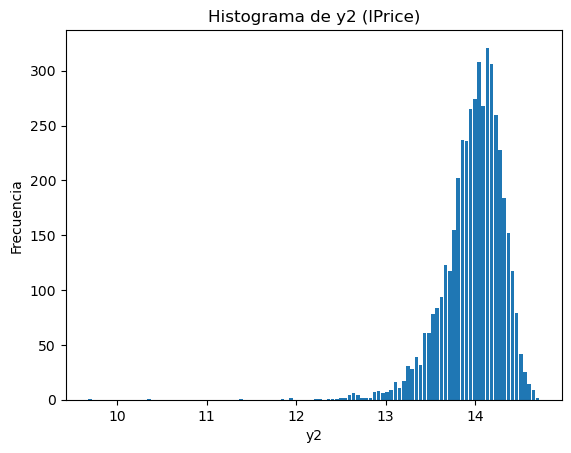

Q1:  13.81328318542297 Mediana:  14.026233831476684 Q3:  14.201191630219697 Desv. Típica: 0.33821869127135884 Media:  13.976583498981562


In [44]:
media=np.mean(y2)
Q1=np.quantile(y2, 0.25)
Q3=np.quantile(y2, 0.75)
Varianza=np.var(y2)
DesviacionTipica=np.std(y2)
Mediana=np.median(y2)
histograma=plt.hist(y2, bins='auto', rwidth=0.85)
plt.xlabel('y2')
plt.ylabel('Frecuencia')
plt.title("Histograma de y2 (lPrice)")
plt.show()
print("Q1: ", Q1,  "Mediana: ", Mediana, "Q3: ", Q3, "Desv. Típica:", DesviacionTipica, "Media: ", np.mean(y2))

De este histograma podemos sacar una serie de conclusiones a partir de la frecuencia del precio:
- La distribución de los precios de la vivienda es asimétrica, con una cola larga a la izquierda. Esto sugiere que hay una mayor proporción de viviendas de precio elevado que de viviendas de precio bajo.
- La mediana de los precios de las viviendas es de aproximadamente 14.03. Esto indica que el 50% de las viviendas tienen precios  inferiores a este valor, y el otro 50% tiene precios superiores.
- La media de los precios de las viviendas es alrededor de 13.98. Esta medida es ligeramente inferior a la mediana, sugiriendo una leve inclinación hacia la izquierda en la distribución de los precios.
- La desviación típica de los precios de las viviendas es aproximadamente 0.34. Esto significa que la mayoría de los precios se encuentran dentro de un rango de ±1.77 veces la desviación típica de la media. Esta desviación indica la dispersión de los precios alrededor de la media transformada.

## Valores predichos  𝑦̂ 

Los valores predichos son las estimaciones que el modelo hace para la variable dependiente (y) dadas las observaciones de las variables independientes. Comparando estos valores con los valores reales de la variable dependiente (y), se evalúa como de bien el modelo representa los datos observados.

In [45]:
yhat=results2.fittedvalues
print (yhat)

0       14.035028
1       14.209988
2       14.021013
3       13.906348
4       13.617032
          ...    
4543    14.051471
4544    14.173424
4545    14.057731
4546    14.420528
4547    13.895691
Length: 4548, dtype: float64


## Residuos

Los residuos son las diferencias entre los valores reales de la variable dependiente (y) y los valores predichos (𝑦̂). Los residuos proporcionan información sobre la magnitud y dirección de los errores de predicción del modelo. Un residuo positivo indica que la predicción fue inferior al valor real, y viceversa.

In [46]:
e=results2.resid
print(e)

np.mean(e)

0      -0.162161
1       0.014907
2      -0.148189
3       0.140764
4      -0.262060
          ...   
4543    0.046844
4544   -0.132641
4545    0.065089
4546   -0.029521
4547    0.023331
Length: 4548, dtype: float64


-2.159085965813686e-14

Una media de residuos muy cercana a cero, como -2.159085965813686e-14, indica que, en promedio, los residuos son mínimos y prácticamente se cancelan entre sí. Esto quiere decir que el modelo está realizando predicciones bastante precisas en promedio, ya que la suma total de los errores es muy pequeña, indicando que, en conjunto, el modelo no tiende a sobreestimar ni subestimar consistentemente los valores observados.

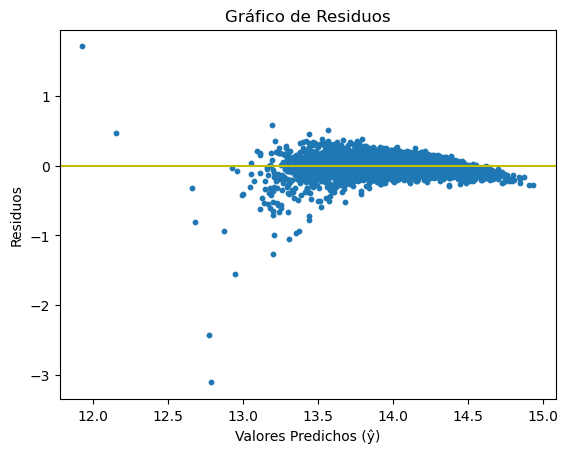

In [47]:
plt.scatter(yhat, e, s=10)
plt.xlabel('Valores Predichos (ŷ)')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos')

plt.axhline(y=0, color='y', linestyle='-')

plt.show()

Como podemos observar en el Gráfico de Residuos, la mayoría de ellos fluctúan entre una banda cerca de y = 0. Esto quiere decir que, complementando con lo que hemos dicho antes con la media de los residuos, en conjunto, el modelo está realizando predicciones bastante precisas en promedio porque su comportamiento es más o menos homogéneo (los residuos de un lado se compensan con los del otro).

## Suma de Cuadrados Totales (SCT)

In [48]:
results2.centered_tss
sum((y2-np.mean(y2))**2)

520.2542844539137

Esta es la variabilidad total de la variable dependiente (y2). En este contexto específico, la SCT es la suma de los cuadrados de las diferencias entre cada valor observado y la media de todos los valores observados. En este caso, la SCT es de aproximadamente 520.25.

## Suma de Cuadrados Explicada (SCE)

In [49]:
results2.ess
sum((results2.fittedvalues-np.mean(y2))**2)

428.6664886021558

Esta es la variabilidad explicada por el modelo de regresión. El valor de 428.67 indica que el modelo está explicando una cantidad significativa de la variabilidad en los datos. En este contexto, es crucial notar que este valor solo cobra sentido en relación con la SCT y otros aspectos del análisis.

## Suma de Cuadrados de los residuos (SCR)

In [50]:
results2.ssr
sum(e**2)

91.58779585175881

Esta es la variabilidad no explicada por el modelo, es decir, la diferencia entre los valores observados y los valores predichos por el modelo. Un valor relativamente pequeño de SCR sugiere que el modelo está ajustando bastante bien los datos, ya que la cantidad de variabilidad no explicada es baja en comparación con la variabilidad total.

## Estimación de la varianza de la perturbación

In [51]:
beta = np.array(results2.params)

# Calcular la estimación de la varianza de los errores
sigmagorro = np.dot(e, e) / (results2.nobs - 1)
sigmagorro

0.020142466648726386

Nos ha salido un valor de 0.020142466648726386. Esto quiere decir que la dispersión de los datos alrededor de la línea de regresión es relativamente baja, lo que implica que el modelo puede explicar una cantidad significativa de la variabilidad observada en los datos.

## Predicción con datos seleccionados

In [52]:
x0 = [1, 12000, 40.5, 7, 4, 10000]
results2.predict(x0)

array([19969.67696166])

Hemos realizado la predicción del lPrice para un valor de:

 - **lAvg. Area Income = 12000**
 - **House Age = 40.5**
 - **Number of Rooms = 7**
 - **Number of Bedrooms = 4**
 - **lArea Population = 10000**	

Y podemos concluir que el lPrice de la vivienda es de 19969.67 dólares para los valores que le hemos pasado.

Esta predicción nos permite obtener una serie de estimaciones de nuestro modelo de regresión para un conjunto específico de valores independientes. Esto resulta sumamente útil para comprender la variabilidad en las estimaciones y evaluar la precisión de nuestro modelo al prever la variable dependiente para diferentes valores de las variables independientes.

In [53]:
predictions = results2.get_prediction(x0)
predictions.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,19969.676962,170.713563,19634.995341,20304.358583,19634.995225,20304.358698


>**mean:** Es la media de las predicciones. En nuestro caso, la media de las predicciones es 19969.676962.

>**mean_se:** Representa el error estándar de la media de las predicciones. En nuestro caso, es 170.713563.

>**mean_ci_lower y mean_ci_upper:** Estos son los límites inferiores y superiores, respectivamente, del intervalo de confianza al 95% para la media de las predicciones. En nuestro caso, el intervalo de confianza para la media de las predicciones va desde 19634.995341 a 20304.358583.

>**obs_ci_lower y obs_ci_upper:** Son los límites inferiores y superiores, respectivamente, del intervalo de confianza al 95% para las observaciones individuales. Estos límites representan el rango dentro del cual se espera que caiga cada observación con un 95% de confianza. En nuestro caso, el intervalo de confianza para cada observación individual está entre 19634.995225 y 20304.358698.

# MULTICOLINEALIDAD

A continuación, vamos a ver si tenemos un problema de multicolinealidad. Que se da cuando existe una alta correlación entre dos o más variables predictoras del modelo. Esto puede causar problemas al intentar estimar los coeficientes de regresión de manera precisa y confiable.

### Número de condición

In [54]:
results2.condition_number ** 0.5

37.288194486122016

Como tenemos un número de condición de 37.29, al ser mayor que 30 tenemos un problema de multicolinealidad.

### FIV

In [55]:
import statsmodels.stats.outliers_influence as oi

vifs=[oi.variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vifs

[983.0889789640219,
 105.2278795953661,
 67.438197727851,
 20.461909773331378,
 880.7575330672645]

El FIV (Factor de Inflación de la Varianza) nos dice que cuando este es superior a 10 ya tenemos un problema grande de multicolinealidad. 
Como nos salen todos mayores ("lAvg. Area Income", "lHouse Age", "Number of Rooms", "Number of Bedrooms", "lArea Population"), parece que sí tenemos un problema de multicolinealidad.

## Matriz de correlación

<div class="alert alert-block alert-info">
<b>A continuación, como hay correlación entre nuestras variables, vamos a hacer la matriz de correlación para ver de forma más exacta qué variables están claramente relacionadas.</b>  
</div>

In [56]:
corr_matrix=np.corrcoef(X2.T)
print(corr_matrix)

[[ 1.         -0.00737043 -0.00633276  0.02458218 -0.01452829]
 [-0.00737043  1.          0.01037491  0.01210783 -0.01750687]
 [-0.00633276  0.01037491  1.          0.48409549 -0.00511646]
 [ 0.02458218  0.01210783  0.48409549  1.         -0.0113165 ]
 [-0.01452829 -0.01750687 -0.00511646 -0.0113165   1.        ]]


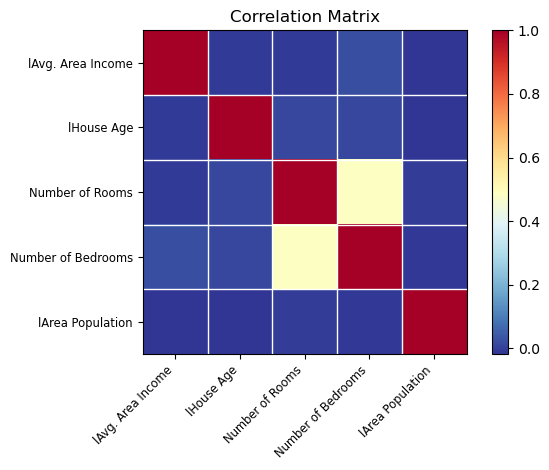

In [57]:
import statsmodels.graphics.api as smg
smg.plot_corr(corr_matrix, xnames=["lAvg. Area Income", "lHouse Age", "Number of Rooms", "Number of Bedrooms", "lArea Population"])
plt.show()

Podemos observar que las variables *Number of Rooms* y *Number of Bedrooms* están muy relacionadas, ya que tienen un coeficiente de correlación en torno a 0,48.

El resto de variables no parece que tengan una relación tan clara entre sí.

# MITIGACIÓN DE LA MULTICOLINEALIDAD

Como hemos visto que las anteriores dos variables están muy relacionadas, vamos a eliminar una de ellas para ver si solucionamos el problema.

Entre *Number of Rooms* y *Number of Bedrooms*, vamos a eliminar *Number of Bedrooms* ya que, como hemos estado viendo, tanto con el p-valor como con el intervalo de confianza, esta variable no era significativa para nuestro modelo.

In [58]:
df = df.drop(columns=['Number of Bedrooms'])

Volvemos a asignar nuestras variables pero ahora quitando *Number of Bedrooms* y volvemos a hacer MCO.

In [59]:
y3=df["lPrice"]
X3=df[["lAvg. Area Income", "lHouse Age", "Number of Rooms", "lArea Population"]]

print(X3)
print(y3)

      lAvg. Area Income  lHouse Age  Number of Rooms  lArea Population
0             11.284084    1.737455              8.0         10.047016
1             11.280346    1.792243              7.0         10.600952
2             11.023324    1.769154              9.0         10.515483
3             11.056355    1.972446              6.0         10.443199
4             11.001803    1.617516              8.0         10.179379
...                 ...         ...              ...               ...
4543          11.345177    1.627761              7.0         10.367137
4544          11.323374    1.673860              7.0         10.624652
4545          11.092764    1.862022              7.0         10.678369
4546          11.239296    1.966932              8.0         10.618322
4547          11.111484    1.852602              9.0          9.774154

[4548 rows x 4 columns]
0       13.872867
1       14.224895
2       13.872824
3       14.047112
4       13.354972
          ...    
4543    14.0983

In [60]:
results3 = sm.OLS(y3, sm.add_constant(X3)).fit()

results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lPrice   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     5315.
Date:                Mon, 18 Dec 2023   Prob (F-statistic):               0.00
Time:                        23:55:05   Log-Likelihood:                 2426.6
No. Observations:                4548   AIC:                            -4843.
Df Residuals:                    4543   BIC:                            -4811.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -7.3121      0.164    -44.525      0.000      -7.634      -6.990
lAvg. Area Income     1.3099      0.013    100.527      0.000       1.284       1.335
lHouse Age            0.8695      0.012     70.985      0.000       0.846       0.894
Number of Rooms       0.1012      0.002     50.383      0.000       0.097       0.105
lArea Population      0.4226      0.007     63.560      0.000       0.410       0.436
==============================================================================
Omnibus:                     4528.227   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1276540.159
Skew:                          -4.236   Prob(JB):                         0.00
Kurtosis:                      84.637   Cond. No.                     1.34e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<div class="alert alert-block alert-info">
<b>Podemos ver que ya no tenemos la variable Number of Bedrooms</b>  
</div>

### Vemos si hemos solucionado el problema

In [61]:
results3.condition_number ** 0.5

36.604318435645084

A pesar de no haber solucionado el problema de multicolinealidad, hemos reducido un poco su número de condición. Al estar bastante cerca de 30, aunque tengamos un problema, podemos continuar analizando nuestro modelo a pesar de la situación.

<div class="alert alert-block alert-info">
<b>Volvemos a hacer la matriz de correlación para ver si podriamos eliminar alguna otra variable.</b>  
</div>

In [62]:
corr_matrix=np.corrcoef(X3.T)
print(corr_matrix)

[[ 1.         -0.00737043 -0.00633276 -0.01452829]
 [-0.00737043  1.          0.01037491 -0.01750687]
 [-0.00633276  0.01037491  1.         -0.00511646]
 [-0.01452829 -0.01750687 -0.00511646  1.        ]]


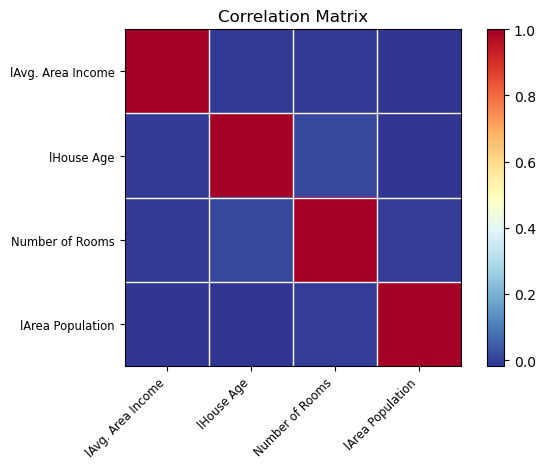

In [63]:
smg.plot_corr(corr_matrix, xnames=["lAvg. Area Income", "lHouse Age", "Number of Rooms", "lArea Population"])
plt.show()

<div class="alert alert-block alert-info">
<b>Como podemos ver, no hay ningún par más de variables que tengan una gran relación entre sí, por lo que no podemos hacer nada más.</b>  
</div>

# NORMALIDAD DE LOS RESIDUOS

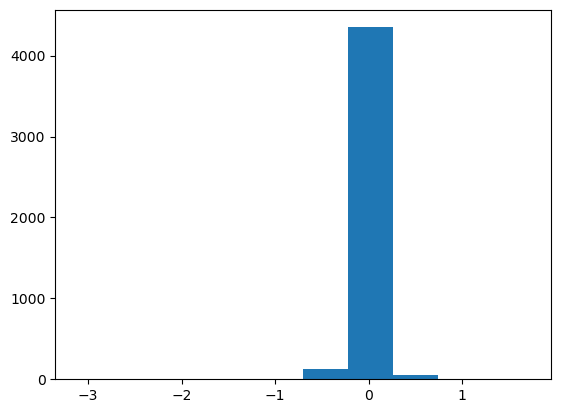

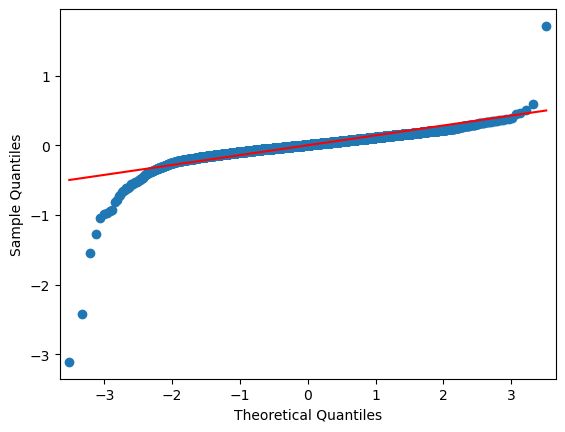

In [65]:
from matplotlib import pyplot
from statsmodels.graphics.gofplots import qqplot
pyplot.hist(results3.resid)
pyplot.show()
qqplot(results3.resid, line='s')
pyplot.show()

In [81]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
test = sms.jarque_bera(results3.resid)
lzip(name, test)

[('Jarque-Bera', 1276540.1592272397),
 ('Chi^2 two-tail prob.', 0.0),
 ('Skew', -4.235624796790127),
 ('Kurtosis', 84.63698677451713)]

- Jarque-Bera: Test de hipótesis que contrasta si los datos de la muestra tienen el coeficiente de simetría y la curtósis de una distribución normal. **1276540.1592272397**. Cuanto mayor sea este valor, más evidencia hay en contra de que los datos provienen de una distribución normal. En este caso, el valor es bastante alto, lo que sugiere que hay evidencia para rechazar la hipótesis de normalidad.
- Chi^2 two-tail prob.(p-valor): p-valor del Test de Jaque-Bera. Nos sale **0.0** . Un valor p pequeño (generalmente menos de 0.05) sugiere que hay evidencia suficiente para rechazar la hipótesis nula. En este caso, el valor p es esencialmente cero, lo que indica fuerte evidencia en contra de la normalidad.
- Skew: Coeficiente de Simetría de pearson de los residuos. **-4.235624796790127**. En este caso, el valor es negativo, lo que sugiere una ligera asimetría hacia la izquierda.
- Kurtosis: Coeficiente de apuntamiento de los residuos. **84.63698677451713**. Es muy alto y sugiere una distribución con colas muy pesadas en comparación con una distribución normal. Esto podría implicar la presencia de valores extremos o datos que se alejan significativamente del centro de la distribución.

## Test de Kolmogórov-Smirnov

Test de Hipótesis para contrastar si una muestra proviene de una distribución (en este caso normal).

In [66]:
import statsmodels.stats.diagnostic as diag

diag.kstest_normal(results3.resid)

(0.08568844297150324, 0.0009999999999998899)

$H_0:$ LOS RESIDUOS SIGUEN UNA DISTRIBUCIÓN NORMAL

$H_1:$ LOS RESIDUOS NO SIGUEN UNA DISTRIBUCIÓN NORMAL

Como nos sale un p-valor muy pequeño, concretamente de 0'00099, podemos rechazar que nuestros residuos sigan una distribución normal en todo su conjunto.

Sin embargo mirando el gráfico vemos como la mayoría de puntos se ajustan a la línea desviandose en los extremos, por lo que podemos afirmar que los residuos del modelo siguen una distribución normal en la mayoría de casos aportando valores que concuerden con los valores reales.

# HETEROCEDASTICIDAD

## Contraste de Breusch-Pagan y White

Para ver si en nuestro modelo tenemos un problema de heterocedasticidad, vamos a aplicar el contraste de Breusch-Pagan y White, ya que tenemos un número de muestras grande (4548 muestras).


*No usamos el contraste de Goldfeld Quandt porque es para un número de muestras pequeño (<100 observaciones).*

$H_0:$ EL MODELO ES HOMOCEDÁSTICO

$H_1:$ EL MODELO ES HETEROCEDÁSTICO

In [67]:
import statsmodels.stats.api as sms
#BREUSH-PAGAN
BP=sms.het_breuschpagan(results3.resid, results3.model.exog)
print("Breush Pagan: ", BP)

Breush Pagan:  (166.38702442473715, 6.234409757129061e-35, 43.1288806299887, 1.4364933249550008e-35)


In [68]:
#WHITE
W=sms.het_white(results3.resid, results3.model.exog)
print("White: ", W)

White:  (681.7056504854213, 2.0666054948817607e-136, 57.08994996791756, 3.1181103348132363e-148)


Como en ambos casos nos salen p-valores muy bajos para ambos contrastes (1.4364933249550008e-35 y 3.1181103348132363e-148 respectivamente), podemos rechazar la hipótesis nula y aceptar $H_1$. Por lo tanto, tenemos un **problema de heterocedasticidad**.

# MITIGACIÓN DE LA HETEROCEDASTICIDAD

## Test de Glesjer 

A continuación, haremos el test de Glesjer para determinar cuál es la variable que nos da el problema de heterocedasticidad. 
Sobre los valores de la h, debemos fijarnos en que p-valor sea menor que 0.05 y luego quedarnos con el que tenga el $R^2$ más alto.

In [69]:
#GLEJSER
z1=df["lAvg. Area Income"] 
for h in [-2, -1, -0.5, 0.5, 1, 2]:
    # |e| = delta_0 + delta_1 z^h + eps
    mcoaux=sm.OLS(abs(results3.resid), sm.add_constant(z1**h)).fit()
    pval=mcoaux.pvalues[1]
    print("h: ", h, "-> pvalt:", pval, "R2: ", mcoaux.rsquared)

h:  -2 -> pvalt: 4.829986157743819e-58 R2:  0.05516579078179007
h:  -1 -> pvalt: 4.1939692692077343e-57 R2:  0.05427030121479548
h:  -0.5 -> pvalt: 1.2377073589557528e-56 R2:  0.05382163659881012
h:  0.5 -> pvalt: 1.0776627521496652e-55 R2:  0.05292382922543626
h:  1 -> pvalt: 3.175851549491674e-55 R2:  0.05247516005236241
h:  2 -> pvalt: 2.744299241961213e-54 R2:  0.05157932091176576


In [70]:
z2=df["lHouse Age"] 
for h in [-2, -1, -0.5, 0.5, 1, 2]:
    # |e| = delta_0 + delta_1 z^h + eps
    mcoaux=sm.OLS(abs(results3.resid), sm.add_constant(z2**h)).fit()
    pval=mcoaux.pvalues[1]
    print("h: ", h, "-> pvalt:", pval, "R2: ", mcoaux.rsquared)

h:  -2 -> pvalt: 1.503078895043384e-32 R2:  0.030572338516229536
h:  -1 -> pvalt: 1.4774579041847885e-31 R2:  0.02960390944610547
h:  -0.5 -> pvalt: 8.884141010845317e-31 R2:  0.028843211115138656
h:  0.5 -> pvalt: 7.437560333706962e-29 R2:  0.026963909514411633
h:  1 -> pvalt: 8.904035396428633e-28 R2:  0.02590900372613203
h:  2 -> pvalt: 1.634088600104929e-25 R2:  0.023691589062962648


In [71]:
z3=df["Number of Rooms"] 
for h in [-2, -1, -0.5, 0.5, 1, 2]:
    # |e| = delta_0 + delta_1 z^h + eps
    mcoaux=sm.OLS(abs(results3.resid), sm.add_constant(z3**h)).fit()
    pval=mcoaux.pvalues[1]
    print("h: ", h, "-> pvalt:", pval, "R2: ", mcoaux.rsquared)

h:  -2 -> pvalt: 6.510712850854505e-10 R2:  0.00836041743444782
h:  -1 -> pvalt: 1.4386537885693944e-08 R2:  0.007044572214107703
h:  -0.5 -> pvalt: 6.025756061366155e-08 R2:  0.006437249710281034
h:  0.5 -> pvalt: 8.219937665215736e-07 R2:  0.005332909384489715
h:  1 -> pvalt: 2.6739055714048728e-06 R2:  0.004836443639693377
h:  2 -> pvalt: 2.211502885918225e-05 R2:  0.003951666948165733


In [72]:
z4=df["lArea Population"] 
for h in [-2, -1, -0.5, 0.5, 1, 2]:
    # |e| = delta_0 + delta_1 z^h + eps
    mcoaux=sm.OLS(abs(results3.resid), sm.add_constant(z4**h)).fit()
    pval=mcoaux.pvalues[1]
    print("h: ", h, "-> pvalt:", pval, "R2: ", mcoaux.rsquared)

h:  -2 -> pvalt: 2.1210562933929567e-65 R2:  0.06215717629635453
h:  -1 -> pvalt: 2.1717786199876373e-54 R2:  0.05167655531882276
h:  -0.5 -> pvalt: 2.8217781836709977e-49 R2:  0.0467719675351701
h:  0.5 -> pvalt: 7.424104923838516e-41 R2:  0.03864637560067108
h:  1 -> pvalt: 1.4998757115307814e-37 R2:  0.03544011522572821
h:  2 -> pvalt: 2.1300895347527595e-32 R2:  0.030424648041465163


De esta forma, vemos cómo, de entre todas la variables, nos quedamos con la variable lArea population en la que encontramos el $R^2$ más alto, siendo 0.06215717629635453, por tanto, vemos que corresponde a h = -2 y aplicamos los cálculos oportunos para corregir esta variable. $w_4 = \frac{1}{\sqrt{z_4^-2}}$

In [73]:
mcp = sm.WLS(y3, sm.add_constant(X3), weights=1./np.sqrt(z4**-2)).fit()    
mcp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                 lPrice   R-squared:                       0.828
Model:                            WLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     5475.
Date:                Mon, 18 Dec 2023   Prob (F-statistic):               0.00
Time:                        23:55:06   Log-Likelihood:                 2509.1
No. Observations:                4548   AIC:                            -5008.
Df Residuals:                    4543   BIC:                            -4976.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -7.3689      0.162    -45.469      0.000      -7.687      -7.051
lAvg. Area Income     1.3034      0.013    101.993      0.000       1.278       1.328
lHouse Age            0.8632      0.012     71.777      0.000       0.840       0.887
Number of Rooms       0.1009      0.002     51.175      0.000       0.097       0.105
lArea Population      0.4362      0.007     64.672      0.000       0.423       0.449
==============================================================================
Omnibus:                     4569.010   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1090757.933
Skew:                          -4.366   Prob(JB):                         0.00
Kurtosis:                      78.364   Cond. No.                     1.35e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
#BREUSH-PAGAN
BP=sms.het_breuschpagan(mcp.resid, mcp.model.exog)
print("Breush Pagan: ", BP)

Breush Pagan:  (171.97936577426347, 3.932085649672865e-36, 44.63543045259865, 8.158278947017603e-37)


<div class="alert alert-block alert-info">
<b>Hemos intentado arreglar el problema de heterocedasticidad, pero no lo hemos conseguido. Podemos ver que cuanto más lo intentamos arreglar, más va a empeorar la situación, ya que el p-valor nos sale cada vez más pequeño.</b>  
</div>

# AUTOCORRELACIÓN

In [75]:
from statsmodels.stats.stattools import durbin_watson
dw=durbin_watson(results3.resid)
print("DW: ", dw)

DW:  2.0075617343541197


<div class="alert alert-block alert-info">
<b>Como no hemos encontrado ninguna tabla con un número de muestras parecido al que usamos en nuestro modelo. Podemos deducir que cómo nos ha salido un número muy cercano a 2, no tenemos problema de autocorrelación en nuestro modelo.</b>  
</div>

# CONCLUSIONES FINALES

Primeramente, vimos como aplicando el modelo inicial, nos daban unos valores que nos iban a complicar el desarrollo del modelo de predicción, por lo que decidimos optar por aplicarle logaritmos a nuestro modelo para que se nos "suavizaran" los resultados. Comparamos ambos modelos observando los valores del AIC y el BIC y, efectivamente, era mejor utilizar el modelo en el cual habíamos aplicado logaritmos.

A continuación, empezamos a ver características del modelo como la significación individual de las variables, la significación global del modelo, los intervalos de confianza de las variables, los residuos, etc. También hicimos la estimación de la varianza de la perturbación aleatoria, así como una predicción con unos datos inventados. Indicando todos estos cálculos que nuestro modelo permitía unas buenas predicciones.

Tras esto, estudiamos la multicolinealidad del modelo, y vimos que había un problema moderado al ver el valor que nos salía en el número condición (37.28), optamos por hacer la matriz de correlación, y vimos que había una gran relación entre *Number of Rooms* y *Number of Bedrooms*, cosa que tiene bastante sentido. Teníamos que desprendernos de una de ellas para intentar solucionar este problema de multicolinealidad, para seleccionarla, nos guiamos con las conclusiones que habíamos obtenido tanto de la significación individual como de los intervalos de confianza, siendo la seleccionada *Number of Bedrooms*. Si bien el problema no terminó de arreglarse, pudimos ver una cierta mejoría en su número de condición.

Más adelante, hemos analizado si nuestros residuos seguían una distribución normal o no. Para ello, hemos hecho el test de Kolmogorov-Smirnov con el que hemos visto que nuestros residuos no seguían una distribución normal. Sin embargo, al hacer la gráfica de los residuos, hemos podido comprobar que, aunque se desvía en los extremos, en la mayoría de su recorrido los residuos siguen una distribución normal.

El siguiente paso, fue ver si teníamos un problema de heterocedasticidad, para ello, utilizamos el contraste de Breusch-Pagan y White, donde comprobamos que el modelo tenía este problema. Para solucionarlo, hicimos el test de Glesjer de las diferentes variables y tratamos de mitigar el problema sin obtener un resultado positivo. 

Por último, comprobamos si teníamos un problema de autocorrelación, en este caso vimos que, tras hacer el test de Durbin-Watson, no teníamos problema alguno al ser este valor muy cercano al 2.

Como conclusión, tras todas estas comprobaciones, podemos establecer que, si bien el modelo tiene algunos problemas leves de multicolinealidad o heterocedasticidad, en general, es un modelo consistente que nos ayudará a hacer unas predicciones sobre el precio de viviendas que en la mayoría de casos se acercarán mucho a la realidad.